In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab07.ipynb")

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Lab 7: The Impact of Minimum Wage on Employment

## Overview

We are going to replicate a study conducted by **[Card and Krueger in 1994](https://davidcard.berkeley.edu/papers/njmin-aer.pdf)** that investigates the relationship between a rise in the minimum wage and employment.

## Background

[Economic theories](https://www.frbsf.org/research-and-insights/publications/economic-letter/2015/12/effects-of-minimum-wage-on-employment/) have long suggested that increases in the minimum wage lead to a reduction in employment for at least two reasons:

1. **Businesses are less likely to hire** and will rather invest in other resources that are now cheaper because of the wage increase.
2. **Higher salaries will induce businesses to raise their prices** to compensate for their greater costs; as prices increase, we expect fewer buyers, which will lead to lower demand and employment.

These theories have found [mixed support](https://www.nber.org/papers/w12663), but the discussion is still very much open within the policy world, as states discuss the opportunity to raise their minimum wage to help local populations to face increasing living costs. Discussions are currently occurring in **[New Jersey](https://www.nytimes.com/2019/01/17/nyregion/nj-minimum-wage.html)** and **[Illinois](https://kmox.radio.com/articles/discussions-underway-raise-illinois-minimum-wage-15hour)** to raise the minimum wage to **$15/hour** ([New York](https://www.nytimes.com/2018/12/31/nyregion/15-minimum-wage-new-york.html?module=inline) has successfully passed this same raise in 2018).

## The Original Study

One of the first studies looking at this policy problem was **Card and Krueger’s**. They applied a difference-in-difference design to look at two groups of fast-food restaurants:

- Fast-food restaurants in **New Jersey** where the minimum wage increased from \$4.25 to \$5.05 per hour (treatment group)
- Fast-food restaurants in **Pennsylvania** where the minimum wage did not increase (control group).

They collected data before and after the minimum wage was approved. Data used in the study can be downloaded [here](https://github.com/DS4PS/PROG-EVAL-III/blob/master/TEXTBOOK/DATA/DID_Example.csv).

## Research Question

- **Do increases in the minimum wage affect employment?**

## Hypothesis

- **An increase in the minimum wage is negatively correlated with employment.**


## Part 1: Diff-in-Diff Conceptual

<!-- BEGIN QUESTION -->

**Question 1.1:** How does the choice of research design, specifically a difference-in-differences approach, influence the validity and reliability of conclusions drawn from empirical studies examining the impact of policy changes, such as minimum wage increases, on economic outcomes like employment? Hint: Think about the parallell trend assumption.

The choice of a DiD approach definitely improves the reliability of the conclusions of studies as long as the parallel trend assumption is correct. DiD models are very good at isolating the causal effects policies by mitigating the effects of confounding variables. 
However, as mentioned, it heavily relies on the parallel trend assumption, i.e., in the absence of intervention, the treatment and control group trends would have been parallel. In this study, we assume that the trend in employment in fast food chains in New Jersey and Pennsylvania would have been the same had New Jersey not increased the minimum wage. Thus, a thorough examination of the trend in the period leading up to it is essential to support this assumption.

<!-- END QUESTION -->

## Part 2: Working with the Data

We now proceed with loading in the data used in the original 1994 study. It cointains the following variables:

| Variable Name | Description                                          |
|---------------|------------------------------------------------------|
| ID            | Unique identifier for fast food                     |
| Treatment     | Pre-treatment (=0) and post-treatment (=1)          |
| Group         | 1 if NJ (treatment); 0 if PA (Control)              |
| Empl          | # of full time employees                             |
| C.Owned       | If owned by a company (=1) or not (=0)               |
| Hours.Opening | Number hours open per day                            |
| Soda          | Price of medium soda, including tax                  |
| Fries         | Price of small fries, including tax                  |
| Chain         | 1 = BK, 2 = KFC, 3 = Roys, 4 = Wendys                |
| SouthJ        | South New Jersey                                     |
| CentralJ      | Central New Jersey                                   |
| NorthJ        | North New Jersey                                     |
| PA1           | Northeast suburbs of Philadelphia                    |
| PA2           | Easton and other PA areas                            |
| Shore         | New Jersey Shore                                     |


In [3]:
dd_df = pd.read_csv('data/DID_Example.csv')
dd_df

,ID,Chain,SouthJ,CentralJ,NorthJ,PA1,PA2,Shore,Group,Empl,C.Owned,Hours.Opening,Soda,Fries,Treatment
0,46,1,0,0,0,1,0,0,0,30.0,0,16.5,1.03,1.03,0
1,49,2,0,0,0,1,0,0,0,6.5,0,13.0,1.01,0.90,0
2,506,2,0,0,0,1,0,0,0,3.0,1,10.0,0.95,0.74,0
3,56,4,0,0,0,1,0,0,0,20.0,1,12.0,0.87,0.82,0
4,61,4,0,0,0,1,0,0,0,6.0,1,12.0,0.87,0.77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,423,2,0,0,1,0,0,0,1,19.0,1,4.0,1.05,0.84,1
816,424,2,0,0,1,0,0,0,1,12.0,1,10.0,1.05,0.94,1
817,426,3,0,0,1,0,0,0,1,5.0,1,19.0,1.11,1.05,1
818,427,4,0,0,1,0,0,0,1,0.0,0,7.0,1.11,1.09,1


**Question 2.1:** Summarize the data above using the `.describe()` Pandas function.

In [4]:
dd_df_summarized = dd_df.describe()
dd_df_summarized

,ID,Chain,SouthJ,CentralJ,NorthJ,PA1,PA2,Shore,Group,Empl,C.Owned,Hours.Opening,Soda,Fries,Treatment
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,802.000000,820.000000,820.000000,790.000000,775.000000,820.000000
mean,246.507317,2.117073,0.226829,0.153659,0.426829,0.087805,0.104878,0.085366,0.807317,8.238778,0.343902,12.650000,1.044911,0.931471,0.500000
std,148.141276,1.109819,0.419037,0.360841,0.494919,0.283184,0.306583,0.279596,0.394647,8.298807,0.475299,4.763907,0.091059,0.107942,0.500305
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.410000,0.670000,0.000000
25%,119.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,10.000000,1.000000,0.850000,0.000000
50%,237.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,14.000000,1.050000,0.940000,0.500000
75%,372.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,16.000000,1.090000,1.010000,1.000000
max,522.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,1.000000,24.000000,1.490000,1.370000,1.000000


In [5]:
grader.check("q2_1")

q2_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.2:** What does each row in `dd_df` represent?

Our DataFrame, `dd_df`, contains data on different fast-food vendors in New Jersey and Pennsylvania in 1992. Each row represents the response from one of the 410 surveyed fast-food vendors. As all the vendors were surveyed twice – both before and after the minimum wage increase on April 1st 1992, there are two responses for each vendor, before and after the intervention marked with `Treatment`.

<!-- END QUESTION -->

**Question 2.3:** What's the average number of employees per fast-food restaurant?

In [6]:
mean_employees = dd_df_summarized.loc['mean','Empl']
mean_employees

8.238778054862843

In [7]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4:** What percentage of fast-food restaurants are part of the treatment group?

In [8]:
per_treatment = 100 * dd_df_summarized.loc['mean','Group']
per_treatment

80.73170731707317

In [9]:
grader.check("q2_4")

q2_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.5:** What's the difference between the `Group` the `Treatment` columns?

The `Group` variable tells us whether the fast-food vendor is placed in New Jersey, `Group = 1`, or Pennsylvania, `Group = 0`. The `Treatment` variable, on the other hand, tells us if it is the vendor's response before `Treatment = 0` or after `Treatment = 1`, April 1st 1992, when the new minimum wage went into effect in New Jersey.

<!-- END QUESTION -->

**Question 2.6:** Notice that our `Chain` column is a categorical variable hidden as a numeric value! One-hot encode this column and save your result in `dd_df_encoded`. You should drop the original column and create 3 new columns: 'BK', KFC', and 'Wendys'. This is helpful for our analysis below.

In [10]:
chain_dummies = pd.get_dummies(dd_df['Chain'])
chain_dummies.columns = ['BK', 'KFC', 'Roys', 'Wendys']
dd_df_encoded = pd.concat([dd_df, chain_dummies], axis=1)
dd_df_encoded = dd_df_encoded.drop(['Chain','Roys'], axis=1)

dd_df_encoded

,ID,SouthJ,CentralJ,NorthJ,PA1,PA2,Shore,Group,Empl,C.Owned,Hours.Opening,Soda,Fries,Treatment,BK,KFC,Wendys
0,46,0,0,0,1,0,0,0,30.0,0,16.5,1.03,1.03,0,True,False,False
1,49,0,0,0,1,0,0,0,6.5,0,13.0,1.01,0.90,0,False,True,False
2,506,0,0,0,1,0,0,0,3.0,1,10.0,0.95,0.74,0,False,True,False
3,56,0,0,0,1,0,0,0,20.0,1,12.0,0.87,0.82,0,False,False,True
4,61,0,0,0,1,0,0,0,6.0,1,12.0,0.87,0.77,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,423,0,0,1,0,0,0,1,19.0,1,4.0,1.05,0.84,1,False,True,False
816,424,0,0,1,0,0,0,1,12.0,1,10.0,1.05,0.94,1,False,True,False
817,426,0,0,1,0,0,0,1,5.0,1,19.0,1.11,1.05,1,False,False,False
818,427,0,0,1,0,0,0,1,0.0,0,7.0,1.11,1.09,1,False,False,True


In [11]:
grader.check("q2_6")

q2_6 results: All test cases passed!

## Part 3: Analysis: Estimating the Difference-in-Differences Model

We now estimate the difference-in-differences model based on the model below. Along with the **Group** and **Treatment** variables, we also include a set of control variables to account for differences across restaurants. For instance, we consider the variable **opening hours**—suggesting that fast-food restaurants open for more hours might need more employees. Similarly, we account for the prices of **fries and sodas**, under the assumption that more expensive fast food might have more resources to hire additional staff.


<!-- BEGIN QUESTION -->

**Question 3.1:** Using the general diff-in-diff model below, specify the model we're about to estimate using $\LaTeX$. Hint: Don't forget to add your controls.

$(1.1)$ 

$$
\begin{split}
Y &= \beta_0 + \beta_1 \cdot \text{Group (our treatment)} + \beta_2 \cdot \text{Treatment (our post)} + \beta_3 \cdot \text{Group} \times \text{Treatment} \\
&\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad+ \beta_4 \cdot \text{Hours.Opening} + \beta_5 \cdot \text{Fries} + \beta_6 \cdot \text{Soda} + e
\end{split}
$$


<!-- END QUESTION -->

**Question 3.2:** Now, rename the relevant column names of the `dd_df` to fit the equation specified in (1.1). Your new column names should be `Treatment` and `Post`, both of which take on binary values. This will simplify our coming analysis!

In [12]:
dd_df =  dd_df_encoded.rename({'Group':'Treatment', 'Treatment':'Post'},axis=1)
dd_df

,ID,SouthJ,CentralJ,NorthJ,PA1,PA2,Shore,Treatment,Empl,C.Owned,Hours.Opening,Soda,Fries,Post,BK,KFC,Wendys
0,46,0,0,0,1,0,0,0,30.0,0,16.5,1.03,1.03,0,True,False,False
1,49,0,0,0,1,0,0,0,6.5,0,13.0,1.01,0.90,0,False,True,False
2,506,0,0,0,1,0,0,0,3.0,1,10.0,0.95,0.74,0,False,True,False
3,56,0,0,0,1,0,0,0,20.0,1,12.0,0.87,0.82,0,False,False,True
4,61,0,0,0,1,0,0,0,6.0,1,12.0,0.87,0.77,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,423,0,0,1,0,0,0,1,19.0,1,4.0,1.05,0.84,1,False,True,False
816,424,0,0,1,0,0,0,1,12.0,1,10.0,1.05,0.94,1,False,True,False
817,426,0,0,1,0,0,0,1,5.0,1,19.0,1.11,1.05,1,False,False,False
818,427,0,0,1,0,0,0,1,0.0,0,7.0,1.11,1.09,1,False,False,True


In [13]:
grader.check("q3_2")

q3_2 results: All test cases passed!

**Question 3.3:** Now, using `statsmodels` run the diff-in-diff from equation (1.1). Note: This is without your controls.

In [14]:
# Create your Treatment*Post variable.
dd_df['Treatment_Post'] = dd_df['Treatment'] * dd_df['Post']

# Define your dependent variable.
Y = dd_df['Empl'] 

# Define your independent variables, including the interaction term
X = dd_df[['Treatment', 'Post', 'Treatment_Post']]

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(Y, X)

# Fit the model
results_33 = model.fit()

# Print the summary of the model
print(results_33.summary())

                            OLS Regression Results                            
Dep. Variable:                   Empl   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 08 Mar 2024   Prob (F-statistic):                nan
Time:                        10:35:57   Log-Likelihood:                    nan
No. Observations:                 820   AIC:                               nan
Df Residuals:                     816   BIC:                               nan
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const                 nan        nan        

In [15]:
grader.check("q3_3")

q3_3 results: All test cases passed!

**Question 3.4.1:** You notice that your output from the `print(results.summary())` gives you all NaN's as cofficients and std errors. This may be because of NaNs in the data. For the sake of simplicity, feel free to just drop all the NaNs for now.

In [16]:
dd_df = dd_df.dropna().reset_index(drop=True)
dd_df

,ID,SouthJ,CentralJ,NorthJ,PA1,PA2,Shore,Treatment,Empl,C.Owned,Hours.Opening,Soda,Fries,Post,BK,KFC,Wendys,Treatment_Post
0,46,0,0,0,1,0,0,0,30.0,0,16.5,1.03,1.03,0,True,False,False,0
1,49,0,0,0,1,0,0,0,6.5,0,13.0,1.01,0.90,0,False,True,False,0
2,506,0,0,0,1,0,0,0,3.0,1,10.0,0.95,0.74,0,False,True,False,0
3,56,0,0,0,1,0,0,0,20.0,1,12.0,0.87,0.82,0,False,False,True,0
4,61,0,0,0,1,0,0,0,6.0,1,12.0,0.87,0.77,0,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,423,0,0,1,0,0,0,1,19.0,1,4.0,1.05,0.84,1,False,True,False,1
753,424,0,0,1,0,0,0,1,12.0,1,10.0,1.05,0.94,1,False,True,False,1
754,426,0,0,1,0,0,0,1,5.0,1,19.0,1.11,1.05,1,False,False,False,1
755,427,0,0,1,0,0,0,1,0.0,0,7.0,1.11,1.09,1,False,False,True,1


In [17]:
grader.check("q3_4_1")

q3_4_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.4.2:** Describe in 1-2 sentences below what you did and how it might affect your later analysis. Also note how many observations you lost. 

To remove the `nan` values from our dataset, I used the `df.dropna()` function, which reduced the number of observations from 820 to 757 (63 observations equivalent to an 8% reduction). This introduces bias in our results if there is a specific pattern in the fast-food vendors with `nan` values.

However, for the analysis in Q3.3./Q3.5, we could have reduced the number of observations dropped to 18 (keeping 802) by looking specifically at the relevant columns and not dropping rows with `nan` values even though we do not look at the columns where the `nan` values are. This could have been done with `df.dropna(subset=['Empl','Treatment','Post','Treatment_Post'])`.

<!-- END QUESTION -->

**Question 3.5:** Repeat the analysis from 3.3 and estimate the diff-in-diff estimator.

In [18]:
# Define your dependent variable.
Y = dd_df['Empl'] 

# Define your independent variables, including the interaction term
X = dd_df[['Treatment', 'Post', 'Treatment_Post']]

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Create the OLS model
model = sm.OLS(Y, X)

# Fit the model
results_35 = model.fit()

# Print the summary of the model
print(results_35.summary())

                            OLS Regression Results                            
Dep. Variable:                   Empl   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.695
Date:                Fri, 08 Mar 2024   Prob (F-statistic):             0.0450
Time:                        10:35:57   Log-Likelihood:                -2655.9
No. Observations:                 757   AIC:                             5320.
Df Residuals:                     753   BIC:                             5338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             10.4408      0.929     11.

In [19]:
grader.check("q3_5")

q3_5 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.6:** Using the Sign, Size, and Significance framework as described below, interpret your findings. Please format your markdown nicely (like the following cell) to aid readability.

### Sign, Size, and Significance (SSS) framework for interpreting regression outputs

#### 1. Sign

- **Expected Sign**: What sign did you expect the estimated parameter(s) to have? Why?
- **Actual Sign**: Does your estimate(s) have this sign (i.e., are you surprised or reassured by your results)?

#### 2. Significance

- **Statistical Significance**: Is the estimate(s) statistically different from zero?
- **T-Statistic**: What is the t-statistic of this hypothesis?

#### 3. Size

- **Effect on Dependent Variable**: How do changes in this variable affect the dependent variable according to your estimation?
- **Economic Significance**: Is this an economically meaningful effect size?

This framework is borrowed from Berkeley's EEP C118 course. See more [here.](https://are.berkeley.edu/courses/EEP118/spring2014/section/Handout4_2014.pdf)

### Sign, Size, and Significance (SSS) framework for interpreting regression outputs

#### 1. Sign

- **Expected Sign**:
    - _Treatment_: This captures any pre-existing differences in employment levels between the two groups before the policy change. As `Treatment = 1` means we are in New Jersey, a positive sign would mean that New Jersey has a higher employment than Pennsylvania in general and vice versa if it is negative. Thus, I do not have any specific expectations for this parameter's sign.
    - _Post_: This term accounts for time trends affecting the treatment and control groups. `Post` is a binary indicator that equals `1` for the period after the policy change and `0` before. The coefficient thus captures general time effects on employment unrelated to the policy intervention. The US was coming out of the early 1990s recession, which could increase demand and thus employment, but at the same time, fast-food vendors might have improved efficiency, which could decrease employment. Thus, this sign could be positive or negative.
    - _TreatmentxPost_: This is the interaction term and key to our analysis. The `Treatment_Post` variable is `1` for fast-food vendors in New Jersey after the policy intervention, i.e. after the increase in the minimum wage. Our hypothesis is that _An increase in the minimum wage is negatively correlated with employment_, and we expect this to be negative as employment should fall in New Jersey after the minimum wage increase.

- **Actual Sign**:
    - _Treatment_: Negative. Hence, stores in New Jersey generally had fewer employees than their Pennsylvania counterparts.
    - _Post_: Negative. Thus, there is a decrease in the average employment over time for all of the vendors.
    - _TreatmentxPost_: Positive. This is surprising as this suggests New Jersey stores are increasing their employment relative to Pennsylvania after adopting a higher minimum wage.

#### 2. Significance

- **Statistical Significance**: 
    - All estimated coefficients are statistically significant at the 95% level.

- **T-Statistic**:
    - _Treatment_: $-2.745$
    - _Post_: $-2.015$
    - _TreatmentxPost_: $2.397$

#### 3. Size

- **Effect on Dependent Variable**:
    - _Treatment_: If the vendor is in New Jersey, it, in general, has $2.847$ employees less than if it had been in Pennsylvania.
    - _Post_: The average number of employees decreased to $2.6943$ employees between when the fast-food vendors were first surveyed and when they were last surveyed.
    - _TreatmentxPost_: The employment at fast-food vendors in New Jersey increased by $3.5708$ compared to Pennsylvania after adopting the new minimum wage.
    
- **Economic Significance**: 
    - The results suggest that though New Jersey adopted a higher minimum wage, they increased the average number of employees by $-2.6943+3.5708 = 0.8765$ (`Post`+`Treatment_Post`). Further, we also see that the average employment in the two states is getting closer to each other as vendors in Pennsylvania decrease their average employment while New Jersey increases it. This could indicate that there might be some regression towards a mean – Pennsylvania might just be higher before and New Jersey lower. The net-effects post is just a regression towards an ideal employment level. Additionally, I see a very low $R^2$ value, of just $1.1\%$, which indicates that our analysis only explains a small part of the variation.

<!-- END QUESTION -->

**Question 3.7:** We notice that our $R^2$ (one of many goodness-of-fit parameters we can use) is very low. To aid our analysis, Include the controls you specified in the $\LaTeX$ equation above.

In [20]:
X = dd_df[['Treatment', 'Post', 'Treatment_Post', 'Hours.Opening', 'Fries', 'Soda']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results_37 = model.fit()
print(results_37.summary())

                            OLS Regression Results                            
Dep. Variable:                   Empl   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     12.12
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           5.02e-13
Time:                        10:35:57   Log-Likelihood:                -2625.0
No. Observations:                 757   AIC:                             5264.
Df Residuals:                     750   BIC:                             5296.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.2470      3.451      0.

In [21]:
grader.check("q3_7")

q3_7 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.8:** Controlling for opening hours, and prices of soda & fries - What is the diff-in-diff estimator for the impact on introducing a minimum wage in New Jersey? Remember to include units and give a brief interpretation of our findings following the SSS framework from above. Be sure to mention how your $R^2$ changed, and it's practical implications. 

The new coefficient for the `Treatment_Post` variable is $4.1275$; thus, including our control variables for the number of hours open and if they serve fries and soda increased the estimated effect of adopting a higher minimum wage.

The $R^2$ value increased from $1.1\%$ to $8.8\%$ when including the control variables; thus, the inclusion of control variables increases the explanatory power of our model though modestly. Our $R^2$ is still quite low, indicating that several unobserved factors are not in the model that influence the average employment rates.

### Sign, Size, and Significance (SSS) framework for interpreting regression outputs

#### 1. Sign

- **Expected Sign**:
    - _TreatmentxPost_: As described previously, our hypothesis that _An increase in the minimum wage is negatively correlated with employment_ would make us expect the coefficient to be negative.

- **Actual Sign**:
    - _TreatmentxPost_: It is positive, which is surprising as this suggests New Jersey stores are increasing their employment relative to Pennsylvania after adopting a higher minimum wage.

#### 2. Significance

- **Statistical Significance**: 
    - The `Treatment_Post` coefficient is statistically significant at the 95% level with a p-value of 0.004.

- **T-Statistic**:
    - _TreatmentxPost_: $2.877$

#### 3. Size

- **Effect on Dependent Variable**:
    - _TreatmentxPost_: The employment at fast-food vendors in New Jersey increased by $4.1275$ compared to Pennsylvania after adopting the new minimum wage.
    
- **Economic Significance**: 
    - The new results suggest that though New Jersey adopted a higher minimum wage, they increased the average number of employees by $-1.4365+4.1275 = 2.6910$. Additionally, I find an increased very low $R^2$ value of just $8.8\%$, which indicates that our analysis still only explains a small part of the variation; however, it is much greater than in our initial analysis.

<!-- END QUESTION -->

## Part 4: Visualizing the diff-in-diff estimator

Below, we plot the difference in difference estimates from question 3.5 and embark on a visual interpretation of our findings.

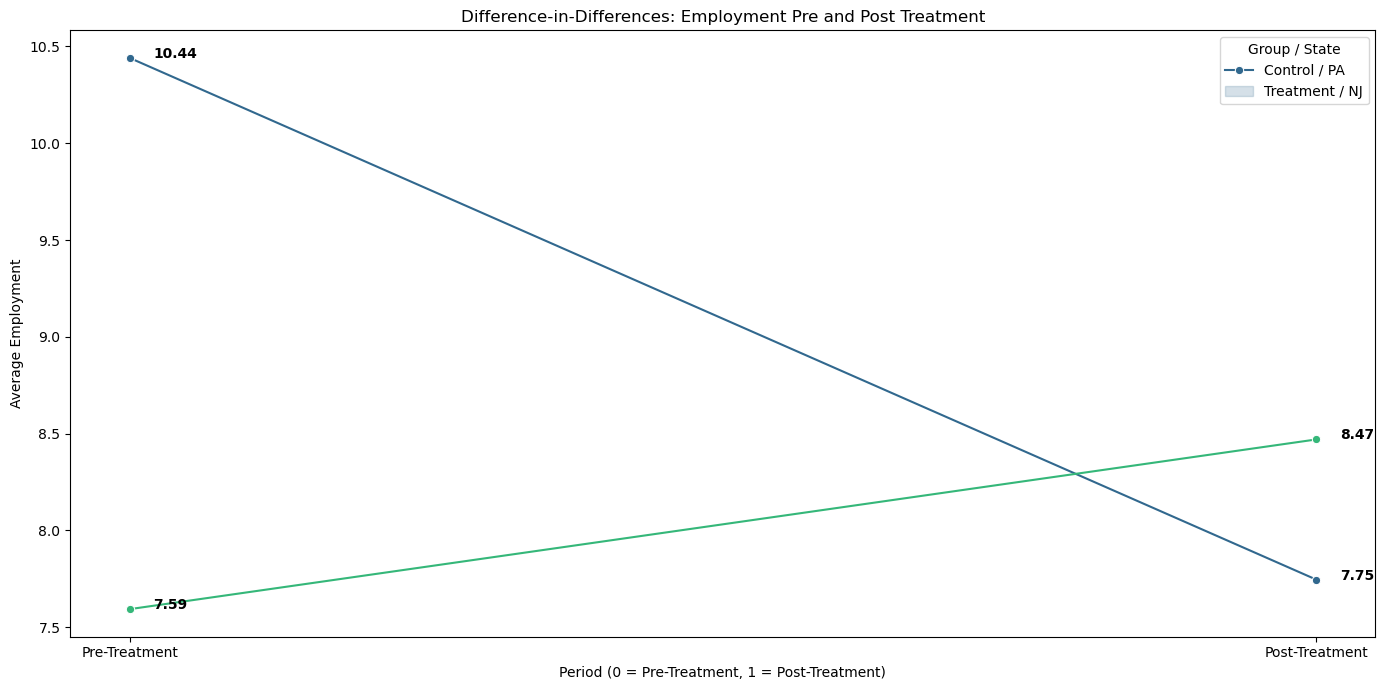

In [22]:
# First, calculate mean employment by group and time
mean_empl = dd_df.groupby(['Treatment', 'Post'])['Empl'].mean().reset_index()

# Now, plot these averages with lines to show the change from pre to post for each group
plt.figure(figsize=(14, 7))
sns.lineplot(x='Post', y='Empl', hue='Treatment', data=mean_empl, marker='o', palette='viridis')

plt.title('Difference-in-Differences: Employment Pre and Post Treatment')
plt.xlabel('Period (0 = Pre-Treatment, 1 = Post-Treatment)')
plt.ylabel('Average Employment')
plt.xticks(ticks=[0, 1], labels=['Pre-Treatment', 'Post-Treatment'])
plt.legend(title='Group / State', labels=['Control / PA', 'Treatment / NJ'])

# Adding annotations for clarity
for line in range(mean_empl.shape[0]):
    plt.text(mean_empl.Post[line]+0.02, mean_empl.Empl[line], 
             f"{mean_empl.Empl[line]:.2f}", horizontalalignment='left', 
             size='medium', color='black', weight='semibold')

plt.tight_layout()
plt.show();

**Question 4.1:** Now, let's make sure we can visually interpret our findings. Match the regression output numbers below to the appropriate regression equation.

**Equations:**

a) $const$

b) $const + \text{Treatment}$

c) $const + \text{Post}$

d) $const + \text{Post} + \text{Treatment} + \text{Treatment*Post}$

**Regression Output Numbers:**

1. $10.44$
2. $7.59$
3. $7.75$
4. $8.49$


In [23]:
print(f'const: {results_35.params["const"]}')
print(f'const+treatment: {results_35.params["const"]+results_35.params["Treatment"]}')
print(f'const+post: {results_35.params["const"]+results_35.params["Post"]}')
print(f'const+post+treatment+treatment_post: {results_35.params["const"]+results_35.params["Post"]+results_35.params["Treatment"]+results_35.params["Treatment_Post"]}')

const: 10.440789473684237
const+treatment: 7.59354838709676
const+post: 7.7464788732394645
const+post+treatment+treatment_post: 8.470000000000006


In [24]:
a = 10.44 # These should be either 10.44, or 7.59, or 7.75, or 8.49
b = 7.59
c = 7.75
d = 8.49 # not the correct number – should be 8.47 at seen from the calculation above

In [25]:
grader.check("q4_1")

q4_1 results: All test cases passed!

**Question 4.2:** Using the numbers from the visualization above, calculate the difference in difference estimate. It should match your estimate from question 3.5.

In [26]:
# dif-in-dif estimate using rounded coefficients
# DD_estimate = (8.47 - 7.59) - (7.75-10.44)

# dif-in-dif estimate using coefficients from the model
const = results_35.params["const"]
const_treatment = results_35.params["const"]+results_35.params["Treatment"]
const_post = results_35.params["const"]+results_35.params["Post"]
const_post_treatment_treatmentpost = results_35.params["const"]+results_35.params["Post"]+results_35.params["Treatment"]+results_35.params["Treatment_Post"]
DD_estimate = (const_post_treatment_treatmentpost - const_treatment) - (const_post - const)
DD_estimate

3.5707622133480186

In [27]:
grader.check("q4_2")

q4_2 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 4.3:** Looking back to your response to question 1.1 and the plot from above, what is a central piece of evidence we're lacking from dataset that would strengthen the validity of our diff-in-diff analysis?

From the evidence seen here, I find it plausible that the parallel trend assumption is violated. Thus, we would need more data before the intervention to ensure this assumption is not violated. More data afterwards would be good to see if it is only short-term effects or if this effect is permanent.

<!-- END QUESTION -->

### Conclusion
Congratulations, you have finished lab 7! We hope you enjoyed the lab - you're one step closer in becoming a master replicator of economics papers...

Have a great week(end)!

Peter.


---
## Feedback

**Question 5:** Please fill out this short [feedback form](https://forms.gle/58k2xRHNn6FSyAJ1A) to let us know your thoughts about this lab! We really appreciate your opinions and feedback! At the end of the Google form, you should see a codeword. Assign the codeword to the variable `codeword` below. 

In [28]:
codeword = 'Card'

In [29]:
grader.check("q5")

q5 results: All test cases passed!

---
## Sources

*FOUNDATIONS OF PROGRAM EVALUATION III REGRESSION TOOLS FOR CAUSAL ANALYSIS* by Data Science for 
Public Service (https://ds4ps.org/PROG-EVAL-III/index.html), retrieved 22 Feb 2024.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [30]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

/Users/johanoelgaard/anaconda3/lib/python3.11/site-packages/nbconvert/utils/pandoc.py:51: RuntimeWarning: You are using an unsupported version of pandoc (3.1.11.1).
Your version must be at least (1.12.1) but less than (3.0.0).
Refer to https://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()


Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q2_1 results: All test cases passed!

    q2_3 results: All test cases passed!

    q2_4 results: All test cases passed!

    q2_6 results: All test cases passed!

    q3_2 results: All test cases passed!

    q3_3 results: All test cases passed!

    q3_4_1 results: All test cases passed!

    q3_5 results: All test cases passed!

    q3_7 results: All test cases passed!

    q4_1 results: All test cases passed!

    q4_2 results: All test cases passed!

    q5 results: All test cases passed!
